<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_%EC%9D%B4%ED%95%AD%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ec%9d%b4%ed%95%ad%eb%b6%84%ed%8f%ac-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

사용할 모듈 포함문

In [128]:
import scipy as sp
from scipy import stats
from scipy.stats import binom #이항분포
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 이항분포

확률 p를 갖는 n번의 독립 시행에서 사건이 발생할 횟수의 분포이다.

특히 확률 p를 갖는 1번의 독립 시행의 이항 분포를 베르누이 분포라고 부른다.

이항분포는 횟수의 분포여서 이산 분포입니다. 이항 분포는 연속 확률 분포가 아닙니다.

[scipy 모듈의 stats.binom 메뉴얼 사이트](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

## 이항분포의 샘플 생성

주사위(한 면이 나올 확률이 1/6)를 20번 던지는 실험을 100번 하였을 때 샘플 데이터를 만드시오.

In [4]:
sample = binom.rvs(n=20,p=1/6,size=100)
print(sample)

[4 1 1 2 3 2 5 4 5 7 3 5 3 2 4 1 2 3 1 5 0 4 3 2 3 3 3 3 4 3 5 1 4 4 2 5 4
 7 4 5 5 5 5 1 3 1 3 4 5 3 6 4 4 2 5 3 3 5 6 2 2 1 5 4 4 4 6 3 5 3 3 1 3 6
 1 2 2 1 9 6 2 5 3 0 6 2 3 2 2 4 2 2 2 5 4 4 3 1 3 3]


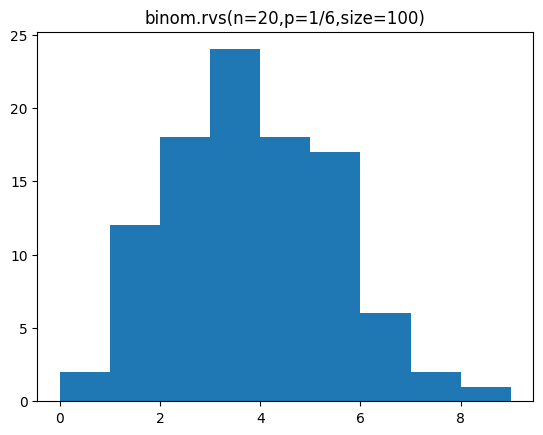

In [5]:
lp = sample.min()
hp = sample.max()+1
plt.hist(sample,bins=range(lp,hp))
plt.title('binom.rvs(n=20,p=1/6,size=100)')
plt.show()

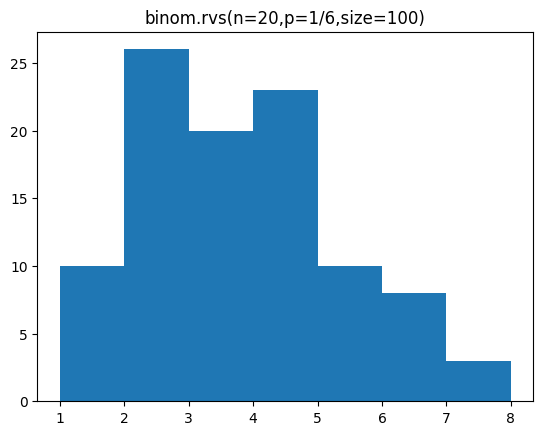

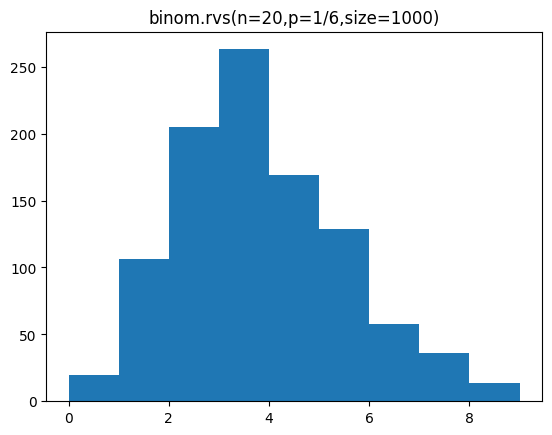

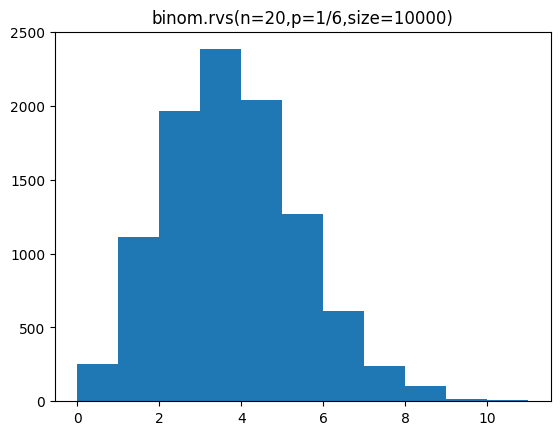

In [13]:
for s in [100,1000,10000]:
  sample = binom.rvs(n=20,p=1/6,size=s)
  lp = sample.min()
  hp = sample.max()+1
  plt.hist(sample,bins=range(lp,hp))
  plt.title(f'binom.rvs(n=20,p=1/6,size={s})')
  plt.show()

- 베르누이 시행과 중심극한정리

In [131]:
def trial_bernoulli_n(p=2/1,size=10,tn=10):
  tl =[]
  for _ in range(tn):
    sample = binom.rvs(n=1,p=p,size=size)
    positive_cnt = np.unique(sample,return_counts=True)[1][1]
    tl.append(positive_cnt)
  return np.array(tl)

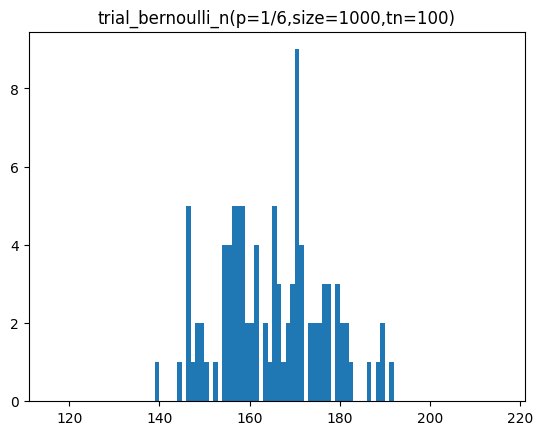

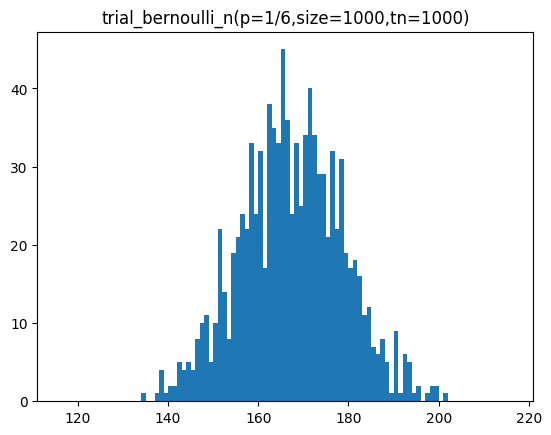

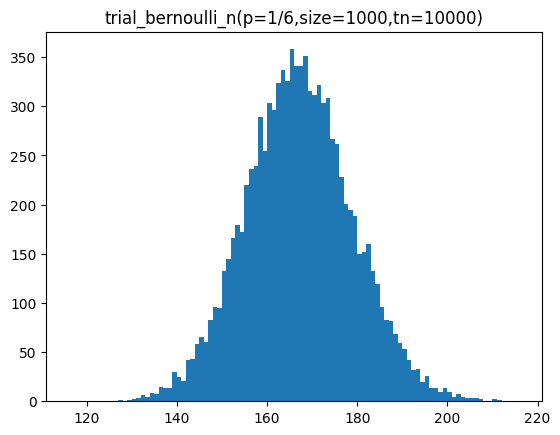

In [134]:
size=1000
p = 1/6
exp_val = int(size*p)
bins = range(exp_val-50,exp_val+51)
for tc in [100,1000,10000]:
  sample = trial_bernoulli_n(p=p,size=size,tn=tc)
  plt.hist(sample,bins=bins)
  plt.title(f'trial_bernoulli_n(p=1/6,size={size},tn={tc})')
  plt.show()

- 이항분포의 확률 밀도 함수

동전을 던져서 앞면이 나올 확률은 1/2이다.

동전을 100번 던졌을 때 나올 횟수별 확률(소수점 이하 2자리)을 구하시오.

In [57]:
x = range(0,100)
y = binom.pmf(n=100,p=1/2,k=x)
print(np.round(y,2))

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.02
 0.02 0.03 0.04 0.05 0.06 0.07 0.07 0.08 0.08 0.08 0.07 0.07 0.06 0.05
 0.04 0.03 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


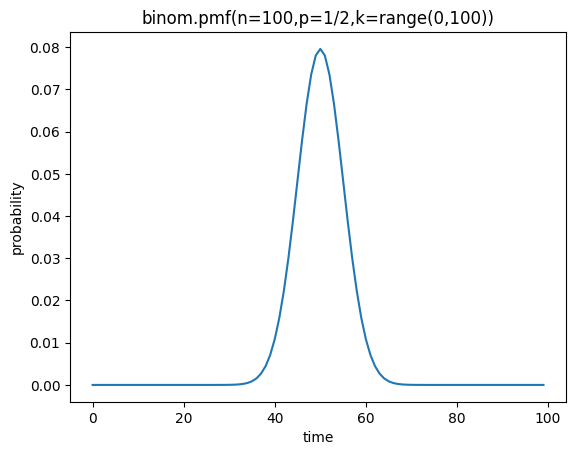

In [135]:
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("probability")
plt.title('binom.pmf(n=100,p=1/2,k=range(0,100))')
plt.show()

- 이항분포의 누적 분포 함수

동전을 던져서 앞면이 나올 확률은 1/2이다.

동전을 100번 던졌을 때 40회 이하가 나올 확률을 소수점 이하 3자리까지 구하시오.

In [72]:
p=0
for i in range(41):
  p += binom.pmf(n=100,p=1/2,k=i)
print(np.round(p,3))

0.028


In [73]:
p = binom.cdf(n=100,p=1/2,k=40)
print(np.round(p,3))

0.028


동전을 100번 던졌을 때 40회 이상 70회 미만이 나올 확률을 소수점 이하 3자리까지 구하시오.

In [105]:
lp = binom.cdf(n=100,p=1/2,k=39)
hp = binom.cdf(n=100,p=1/2,k=69)
print(hp-lp)
print(np.round(hp-lp,3))

0.9823606491929197
0.982


In [107]:
p=0
for i in range(40,70):
  p += binom.pmf(n=100,p=1/2,k=i)
print(p)
print(np.round(p,3))

0.9823606491929195
0.982


- 이항분포의 생존함수

동전을 100번 던졌을 때 60회 이상 나올 확률을 소수점 이하 3자리까지 구하시오.

In [136]:
neg_p = binom.cdf(n=100,p=1/2,k=59)
print(round(1-neg_p,3))

0.028


In [111]:
p = binom.sf(n=100,p=1/2,k=59)
print(round(p,3))

0.028


In [114]:
p = 1
for i in range(60):
  p -= binom.pmf(n=100,p=1/2,k=i)
print(round(p,3))

0.028


- 이항분포의 퍼센트 포인트 함수


동전을 100번 던졌을 때 n회 이상 나올 확률이 80%가 처음으로 넘는다고 한다. n을 구하시오.

In [116]:
n = binom.ppf(n=100,p=1/2,q=0.8)
print(int(n))

54


In [117]:
print(binom.cdf(n=100,p=1/2,k=53))
print(binom.cdf(n=100,p=1/2,k=54))

0.7579407931963542
0.8158991913366521
